In [ ]:
!pip install vaex
!pip install pyyaml==5.4.1
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.2/376.2 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install rsmtool

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import vaex
import numpy as np
#import rsmtool
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore');

ModuleNotFoundError: No module named 'vaex'

In [ ]:
train = pd.read_csv('./TRAIN.csv')
train=pd.DataFrame(train)

In [ ]:
train=train.iloc[:,1:39]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14251 entries, 0 to 14250
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   StudentNumber                   14251 non-null  int64  
 1   useraccount_id                  14251 non-null  int64  
 2   SchoolNumber                    14251 non-null  int64  
 3   SchoolName                      14251 non-null  object 
 4   FRL_Status                      14251 non-null  int64  
 5   Sex                             14251 non-null  int64  
 6   Race_Indicator                  14251 non-null  int64  
 7   Hispanic_Indicator              14251 non-null  int64  
 8   TotalNumberofAbsences           14251 non-null  int64  
 9   RetakerFlag                     14251 non-null  int64  
 10  AlgScaleScore                   14251 non-null  int64  
 11  AlgAchievementLevel             14251 non-null  int64  
 12  FSAMath_2018_ScaleScore         

In [ ]:
train['FSAMath_2018_ScaleScore'].mean()

349.50956243116053

In [ ]:
value={"FSAMath_2018_ScaleScore":train['FSAMath_2018_ScaleScore'].mean()," FSAMath_2018_AchievementLevel":train[' FSAMath_2018_AchievementLevel'].mean()}

In [ ]:
train=train.fillna(value=value)
train=train.fillna(0)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14251 entries, 0 to 14250
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   StudentNumber                   14251 non-null  int64  
 1   useraccount_id                  14251 non-null  int64  
 2   SchoolNumber                    14251 non-null  int64  
 3   SchoolName                      14251 non-null  object 
 4   FRL_Status                      14251 non-null  int64  
 5   Sex                             14251 non-null  int64  
 6   Race_Indicator                  14251 non-null  int64  
 7   Hispanic_Indicator              14251 non-null  int64  
 8   TotalNumberofAbsences           14251 non-null  int64  
 9   RetakerFlag                     14251 non-null  int64  
 10  AlgScaleScore                   14251 non-null  int64  
 11  AlgAchievementLevel             14251 non-null  int64  
 12  FSAMath_2018_ScaleScore         

In [ ]:
train

NameError: name 'train' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

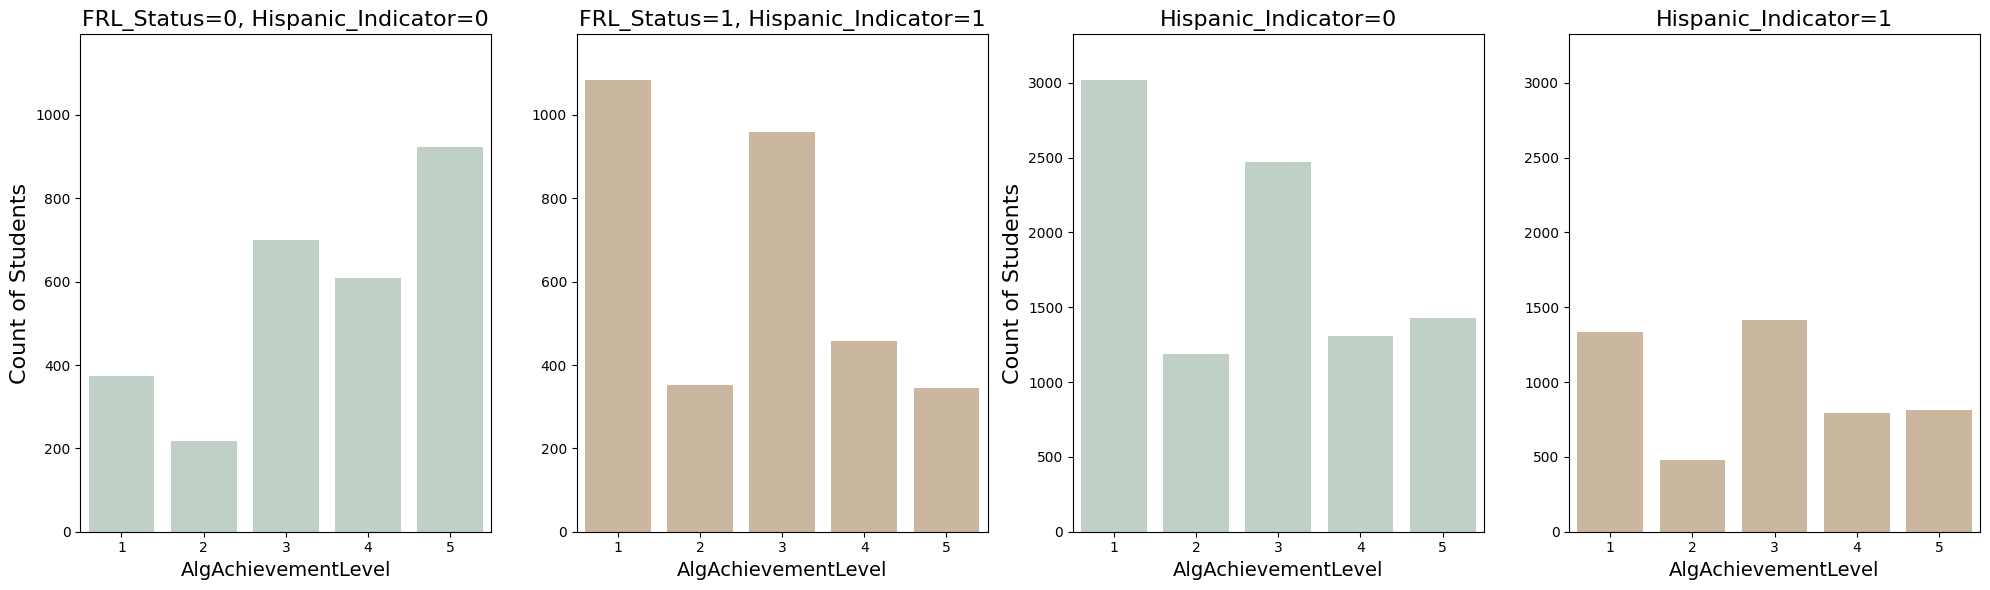

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Define color palette
colors = ["#A3C1AD", "#C19A6B", "#A3C1AD", "#C19A6B"]  # Alternating colors

# Define categories and titles for each subplot
categories = [
    ("FRL_Status=0, Hispanic_Indicator=0", train[(train["FRL_Status"] == 0) & (train["Hispanic_Indicator"] == 0)]),
    ("FRL_Status=1, Hispanic_Indicator=1", train[(train["FRL_Status"] == 1) & (train["Hispanic_Indicator"] == 1)]),
    ("Hispanic_Indicator=0", train[train["Hispanic_Indicator"] == 0]),
    ("Hispanic_Indicator=1", train[train["Hispanic_Indicator"] == 1])
]

# Compute Y-axis limits separately for left and right subplots
left_max = max(train[(train["FRL_Status"] == 0) & (train["Hispanic_Indicator"] == 0)]["AlgAchievementLevel"].value_counts().max(),
               train[(train["FRL_Status"] == 1) & (train["Hispanic_Indicator"] == 1)]["AlgAchievementLevel"].value_counts().max())

right_max = max(train[train["Hispanic_Indicator"] == 0]["AlgAchievementLevel"].value_counts().max(),
                train[train["Hispanic_Indicator"] == 1]["AlgAchievementLevel"].value_counts().max())

# Loop through each category and create a bar chart
for i, (label, subset) in enumerate(categories):
    count_data = subset["AlgAchievementLevel"].value_counts().sort_index()
    sns.barplot(x=count_data.index, y=count_data.values, ax=axes[i], color=colors[i], alpha=0.7)
    axes[i].set_title(label, fontsize=16)
    axes[i].set_xlabel("AlgAchievementLevel", fontsize=14)

    # Apply different Y-axis scales
    if i < 2:
        axes[i].set_ylim(0, left_max * 1.1)  # Left two plots share the same scale
    else:
        axes[i].set_ylim(0, right_max * 1.1)  # Right two plots share a different scale

# Set shared Y-axis labels only on the first and third plots
axes[0].set_ylabel("Count of Students", fontsize=16)
axes[2].set_ylabel("Count of Students", fontsize=16)
image_path = "aa.png"
plt.savefig(image_path, dpi=600)
# Adjust layout for better readability
plt.tight_layout()
plt.show()
# Save the figure


In [ ]:
train['Sub_Group']=1

In [ ]:
for i in range(0,14251):             # 筛选district列有394行
        #判断第20列中的值如果为0
        if ((train['FRL_Status'][i]==0) and (train['Race_Indicator'][i]==0) & (train['Hispanic_Indicator'][i]==0)):
            train['Sub_Group'][i]= 0
            #这里筛选出plot_no列，plot_no列中满足条件Data.iloc[i,1]， 然后将对应的FL列修改为“T1”
        elif ((train['FRL_Status'][i]==0) & (train['Race_Indicator'][i]==0) & (train['Hispanic_Indicator'][i]==1)):
            train['Sub_Group'][i]= 1
        elif ((train['FRL_Status'][i]==0) & (train['Race_Indicator'][i]==1) & (train['Hispanic_Indicator'][i]==0)):
            train['Sub_Group'][i]= 2
        elif ((train['FRL_Status'][i]==0) & (train['Race_Indicator'][i]==1) & (train['Hispanic_Indicator'][i]==1)):
            train['Sub_Group'][i]= 3
        elif ((train['FRL_Status'][i]==1) & (train['Race_Indicator'][i]==0) & (train['Hispanic_Indicator'][i]==0)):
            train['Sub_Group'][i]= 4
        elif ((train['FRL_Status'][i]==1) & (train['Race_Indicator'][i]==0) & (train['Hispanic_Indicator'][i]==1)):
            train['Sub_Group'][i]= 5
        elif ((train['FRL_Status'][i]==1) & (train['Race_Indicator'][i]==1) & (train['Hispanic_Indicator'][i]==0)):
            train['Sub_Group'][i]= 6
        elif ((train['FRL_Status'][i]==1) & (train['Race_Indicator'][i]==1) & (train['Hispanic_Indicator'][i]==1)):
            train['Sub_Group'][i]= 7

In [ ]:
train=train.drop(['FRL_Status','Race_Indicator','Hispanic_Indicator'], axis = 1)
train=train.drop(['useraccount_id'], axis = 1)
#train=train.drop(['AlgScaleScore'], axis = 1)
#train= train.drop(['AlgAchievementLevel'], axis = 1)
train = train.drop(['StudentNumber','SchoolName','Sex','RetakerFlag','bio_video_watch', 'document_view',
       'leaderboard_load',
       'personal_profile_picture',  'tys_review_correct_question','wall_load_more',
       'wall_make_post',  'wall_search'], axis = 1)

In [ ]:
X = train
y = train[['AlgAchievementLevel','Sub_Group']]
#X = train.drop(['AlgAchievementLevel'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
X_train = pd.get_dummies(X_train)
X_test1=X_test
#X_test = X_test.drop(['useraccount_id'], axis = 1)
#X_test = X_test.drop(['StudentNumber','SchoolName','Sex','RetakerFlag','bio_video_watch', 'document_view',
       #'leaderboard_load',
       #'personal_profile_picture',  'tys_review_correct_question','wall_load_more',
       #'wall_make_post',  'wall_search'], axis = 1)
X_test = pd.get_dummies(X_test)

In [ ]:
X_train

,SchoolNumber,TotalNumberofAbsences,AlgScaleScore,AlgAchievementLevel,FSAMath_2018_ScaleScore,FSAMath_2018_AchievementLevel,ass_true_counts,ass_num_counts,karma_awarded,ortan_load,...,tys_finish,tys_load,tys_previous,tys_review_incorrect_question,tys_review_solution_video,tys_review_topic_video,tys_unload,video_watch,wall_page_load,Sub_Group
9737,371,2,478,1,329.000000,2.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
1748,171,13,484,1,329.000000,2.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4904,2831,33,531,4,358.000000,4.000000,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,3
12485,3623,5,503,3,332.000000,2.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7
2185,1751,7,453,1,349.509562,3.568038,3.0,11.0,0.0,0.0,...,2.0,4.0,0.0,0.0,22.0,0.0,0.0,654.0,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,3541,7,493,2,349.509562,3.568038,13.0,32.0,0.0,0.0,...,5.0,9.0,4.0,0.0,0.0,0.0,3.0,98.0,11.0,7
5192,1751,8,512,3,315.000000,1.000000,0.0,0.0,0.0,0.0,...,11.0,1.0,1.0,19.0,0.0,0.0,9.0,0.0,29.0,6
12172,3861,23,506,3,349.509562,3.568038,1.0,7.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0
235,1661,3,504,3,349.000000,3.000000,14.0,46.0,0.0,2.0,...,11.0,10.0,1.0,3.0,62.0,0.0,2.0,780.0,44.0,7


In [ ]:
train.columns

Index(['SchoolNumber', 'TotalNumberofAbsences', 'AlgScaleScore',
       'AlgAchievementLevel', 'FSAMath_2018_ScaleScore',
       ' FSAMath_2018_AchievementLevel', 'ass_true_counts', 'ass_num_counts',
       'karma_awarded', 'ortan_load', 'ortan_video_watch', 'survey_displayed',
       'tys_answer', 'tys_finish', 'tys_load', 'tys_previous',
       'tys_review_incorrect_question', 'tys_review_solution_video',
       'tys_review_topic_video', 'tys_unload', 'video_watch', 'wall_page_load',
       'Sub_Group'],
      dtype='object')

In [ ]:
train[(train['Sub_Group']==0) & ((train['AlgAchievementLevel'] ==5) | (train['AlgAchievementLevel'] ==1))]

,SchoolNumber,TotalNumberofAbsences,AlgScaleScore,AlgAchievementLevel,FSAMath_2018_ScaleScore,FSAMath_2018_AchievementLevel,ass_true_counts,ass_num_counts,karma_awarded,ortan_load,...,tys_finish,tys_load,tys_previous,tys_review_incorrect_question,tys_review_solution_video,tys_review_topic_video,tys_unload,video_watch,wall_page_load,Sub_Group
19,3731,8,482,1,349.509562,3.568038,127.0,349.0,0.0,0.0,...,52.0,28.0,33.0,318.0,4.0,1.0,13.0,139.0,30.0,0
52,3541,28,468,1,349.509562,3.568038,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,7.0,0
74,1931,13,473,1,349.509562,3.568038,8.0,39.0,0.0,0.0,...,5.0,9.0,1.0,0.0,1.0,0.0,6.0,0.0,28.0,0
120,2831,11,450,1,349.509562,3.568038,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,980.0,18.0,0
184,171,4,461,1,309.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910,951,6,533,5,349.509562,3.568038,17.0,41.0,0.0,0.0,...,6.0,8.0,10.0,12.0,3.0,1.0,0.0,2527.0,23.0,0
13980,3151,9,538,5,349.509562,3.568038,4.0,6.0,0.0,0.0,...,1.0,2.0,0.0,13.0,0.0,0.0,1.0,992.0,11.0,0
13993,1741,1,469,1,349.509562,3.568038,4.0,15.0,0.0,0.0,...,2.0,6.0,0.0,0.0,0.0,1.0,3.0,1477.0,14.0,0
14160,2351,1,479,1,349.509562,3.568038,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,11.0,0


In [ ]:
Sub0_0=X_train[(X_train['Sub_Group']==0) & ((train['AlgAchievementLevel'] ==1) | (train['AlgAchievementLevel'] ==2))]
Sub0_1=X_train[(X_train['Sub_Group']==0) & ((train['AlgAchievementLevel'] ==4) | (train['AlgAchievementLevel'] ==5))]
Sub1_0=X_train[(X_train['Sub_Group']==1) & ((train['AlgAchievementLevel'] ==1) | (train['AlgAchievementLevel'] ==2))]
Sub1_1=X_train[(X_train['Sub_Group']==1) & ((train['AlgAchievementLevel'] ==4) | (train['AlgAchievementLevel'] ==5))]
Sub2_0=X_train[(X_train['Sub_Group']==2) & ((train['AlgAchievementLevel'] ==1) | (train['AlgAchievementLevel'] ==2))]
Sub2_1=X_train[(X_train['Sub_Group']==2) & ((train['AlgAchievementLevel'] ==4) | (train['AlgAchievementLevel'] ==5))]
Sub3_0=X_train[(X_train['Sub_Group']==3) & ((train['AlgAchievementLevel'] ==1) | (train['AlgAchievementLevel'] ==2))]
Sub3_1=X_train[(X_train['Sub_Group']==3) & ((train['AlgAchievementLevel'] ==4) | (train['AlgAchievementLevel'] ==5))]
Sub4_0=X_train[(X_train['Sub_Group']==4) & ((train['AlgAchievementLevel'] ==1) | (train['AlgAchievementLevel'] ==2))]
Sub4_1=X_train[(X_train['Sub_Group']==4) & ((train['AlgAchievementLevel'] ==4) | (train['AlgAchievementLevel'] ==5))]
Sub5_0=X_train[(X_train['Sub_Group']==5) & ((train['AlgAchievementLevel'] ==1) | (train['AlgAchievementLevel'] ==2))]
Sub5_1=X_train[(X_train['Sub_Group']==5) & ((train['AlgAchievementLevel'] ==4) | (train['AlgAchievementLevel'] ==5))]
Sub6_0=X_train[(X_train['Sub_Group']==6) & ((train['AlgAchievementLevel'] ==1) | (train['AlgAchievementLevel'] ==2))]
Sub6_1=X_train[(X_train['Sub_Group']==6) & ((train['AlgAchievementLevel'] ==4) | (train['AlgAchievementLevel'] ==5))]
Sub7_0=X_train[(X_train['Sub_Group']==7) & ((train['AlgAchievementLevel'] ==1) | (train['AlgAchievementLevel'] ==2))]
Sub7_1=X_train[(X_train['Sub_Group']==7) & ((train['AlgAchievementLevel'] ==4) | (train['AlgAchievementLevel'] ==5))]

In [ ]:
X_train = X_train.drop(['AlgAchievementLevel'], axis = 1)
X_test = X_test.drop(['AlgAchievementLevel'], axis = 1)

In [ ]:
Sub0_0

,SchoolNumber,TotalNumberofAbsences,AlgScaleScore,AlgAchievementLevel,FSAMath_2018_ScaleScore,FSAMath_2018_AchievementLevel,ass_true_counts,ass_num_counts,karma_awarded,ortan_load,...,tys_finish,tys_load,tys_previous,tys_review_incorrect_question,tys_review_solution_video,tys_review_topic_video,tys_unload,video_watch,wall_page_load,Sub_Group
11814,1901,9,475,1,323.000000,2.000000,0.0,6.0,0.0,2.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,0
3886,3861,15,483,1,339.000000,3.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3470,1931,15,496,2,323.000000,2.000000,2.0,8.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,0
5645,3971,8,491,2,325.000000,2.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0
558,951,14,477,1,349.509562,3.568038,12.0,32.0,0.0,0.0,...,5.0,9.0,15.0,0.0,0.0,0.0,3.0,313.0,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,2831,9,477,1,345.000000,3.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
3572,3623,10,488,2,338.000000,3.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12351,2831,24,484,1,349.509562,3.568038,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5145,2751,6,485,1,333.000000,2.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14251 entries, 0 to 14250
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SchoolNumber                    14251 non-null  int64  
 1   TotalNumberofAbsences           14251 non-null  int64  
 2   AlgScaleScore                   14251 non-null  int64  
 3   AlgAchievementLevel             14251 non-null  int64  
 4   FSAMath_2018_ScaleScore         14251 non-null  float64
 5    FSAMath_2018_AchievementLevel  14251 non-null  float64
 6   ass_true_counts                 14251 non-null  float64
 7   ass_num_counts                  14251 non-null  float64
 8   karma_awarded                   14251 non-null  float64
 9   ortan_load                      14251 non-null  float64
 10  ortan_video_watch               14251 non-null  float64
 11  survey_displayed                14251 non-null  float64
 12  tys_answer                      

In [ ]:
for i in range(0,14251):             # 筛选district列有394行
        #判断第20列中的值如果为0
        if train.iloc[i,6]>=3:
            train.iloc[i,6]= 1
            #这里筛选出plot_no列，plot_no列中满足条件Data.iloc[i,1]， 然后将对应的FL列修改为“T1”
        elif train.iloc[i,6]<3:
            train.iloc[i,6]=0

In [ ]:
train

,SchoolNumber,TotalNumberofAbsences,AlgScaleScore,AlgAchievementLevel,FSAMath_2018_ScaleScore,FSAMath_2018_AchievementLevel,ass_true_counts,ass_num_counts,karma_awarded,ortan_load,...,tys_finish,tys_load,tys_previous,tys_review_incorrect_question,tys_review_solution_video,tys_review_topic_video,tys_unload,video_watch,wall_page_load,Sub_Group
0,3623,4,487,2,344.000000,3.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,1901,35,454,1,349.509562,3.568038,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.0,3.0,6
2,1241,5,494,2,349.509562,3.568038,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7
3,1151,10,462,1,349.509562,3.568038,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,8.0,6
4,1711,18,452,1,349.509562,3.568038,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,1451,10,500,3,349.509562,3.568038,0.0,0.0,0.0,0.0,...,7.0,0.0,2.0,9.0,0.0,0.0,8.0,0.0,60.0,2
14247,1751,5,477,1,349.509562,3.568038,1.0,30.0,0.0,0.0,...,36.0,13.0,10.0,16.0,11.0,1.0,33.0,0.0,89.0,6
14248,951,6,522,4,379.000000,5.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
14249,1931,10,492,2,345.000000,3.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
Sub2_0

In [ ]:
FL1_1=train[(train['FRL_Status']==1) & (train['AlgAchievementLevel'] ==1)]
FL1_1=FL1_1.iloc[1:4000,:]
FL0_0=train[(train['FRL_Status']==0) & (train['AlgAchievementLevel'] ==0)]
FL0_0=FL0_0.iloc[1:900,:]
FL0_1=train[(train['FRL_Status']==0) & (train['AlgAchievementLevel'] ==1)]
FL0_1=FL0_1.iloc[1:4000,:]
FL1_0=train[(train['FRL_Status']==1) & (train['AlgAchievementLevel'] ==0)]
FL1_0=FL1_0.iloc[1:5000,:]



RC1_1=train[(train['Race_Indicator']==1) & (train['AlgAchievementLevel'] ==1)]
RC1_1=RC1_1.iloc[1:6000,:]
RC0_0=train[(train['Race_Indicator']==0) & (train['AlgAchievementLevel'] ==0)]
RC0_0=RC0_0.iloc[1:600,:]
HP1_1=train[(train['Hispanic_Indicator']==1) & (train['AlgAchievementLevel'] ==1)]
HP1_1=HP1_1.iloc[1:3000,:]
HP0_0=train[(train['Hispanic_Indicator']==0) & (train['AlgAchievementLevel'] ==0)]
HP0_0=HP0_0.iloc[1:4000,:]

KeyError: 'FRL_Status'

In [ ]:
FL1_0=train[(train['FRL_Status']==1) & (train['AlgAchievementLevel'] ==0)]
FL1_0

,SchoolNumber,FRL_Status,Race_Indicator,Hispanic_Indicator,TotalNumberofAbsences,AlgScaleScore,AlgAchievementLevel,FSAMath_2018_ScaleScore,FSAMath_2018_AchievementLevel,ass_true_counts,...,tys_answer,tys_finish,tys_load,tys_previous,tys_review_incorrect_question,tys_review_solution_video,tys_review_topic_video,tys_unload,video_watch,wall_page_load
0,3623,1,1,1,4,487,0,344.000000,3.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1901,1,1,0,35,454,0,349.509562,3.568038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.0,3.0
2,1241,1,1,1,5,494,0,349.509562,3.568038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1151,1,1,0,10,462,0,349.509562,3.568038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,8.0
4,1711,1,1,0,18,452,0,349.509562,3.568038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14241,171,1,1,1,4,460,0,349.509562,3.568038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14242,3731,1,1,0,5,484,0,349.509562,3.568038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
14243,1151,1,1,0,10,425,0,349.509562,3.568038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14245,361,1,1,0,13,439,0,349.509562,3.568038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0


In [ ]:
rcParams['figure.figsize'] = 30, 22
train[['SchoolNumber','SchoolName', 'FRL_Status',
          'Sex', 'Race_Indicator', 'Hispanic_Indicator', 'TotalNumberofAbsences', 'RetakerFlag', 'AlgScaleScore', 'AlgAchievementLevel','FSAMath_2018_ScaleScore']].hist()


KeyError: "['SchoolName', 'FRL_Status', 'Sex', 'Race_Indicator', 'Hispanic_Indicator', 'RetakerFlag'] not in index"

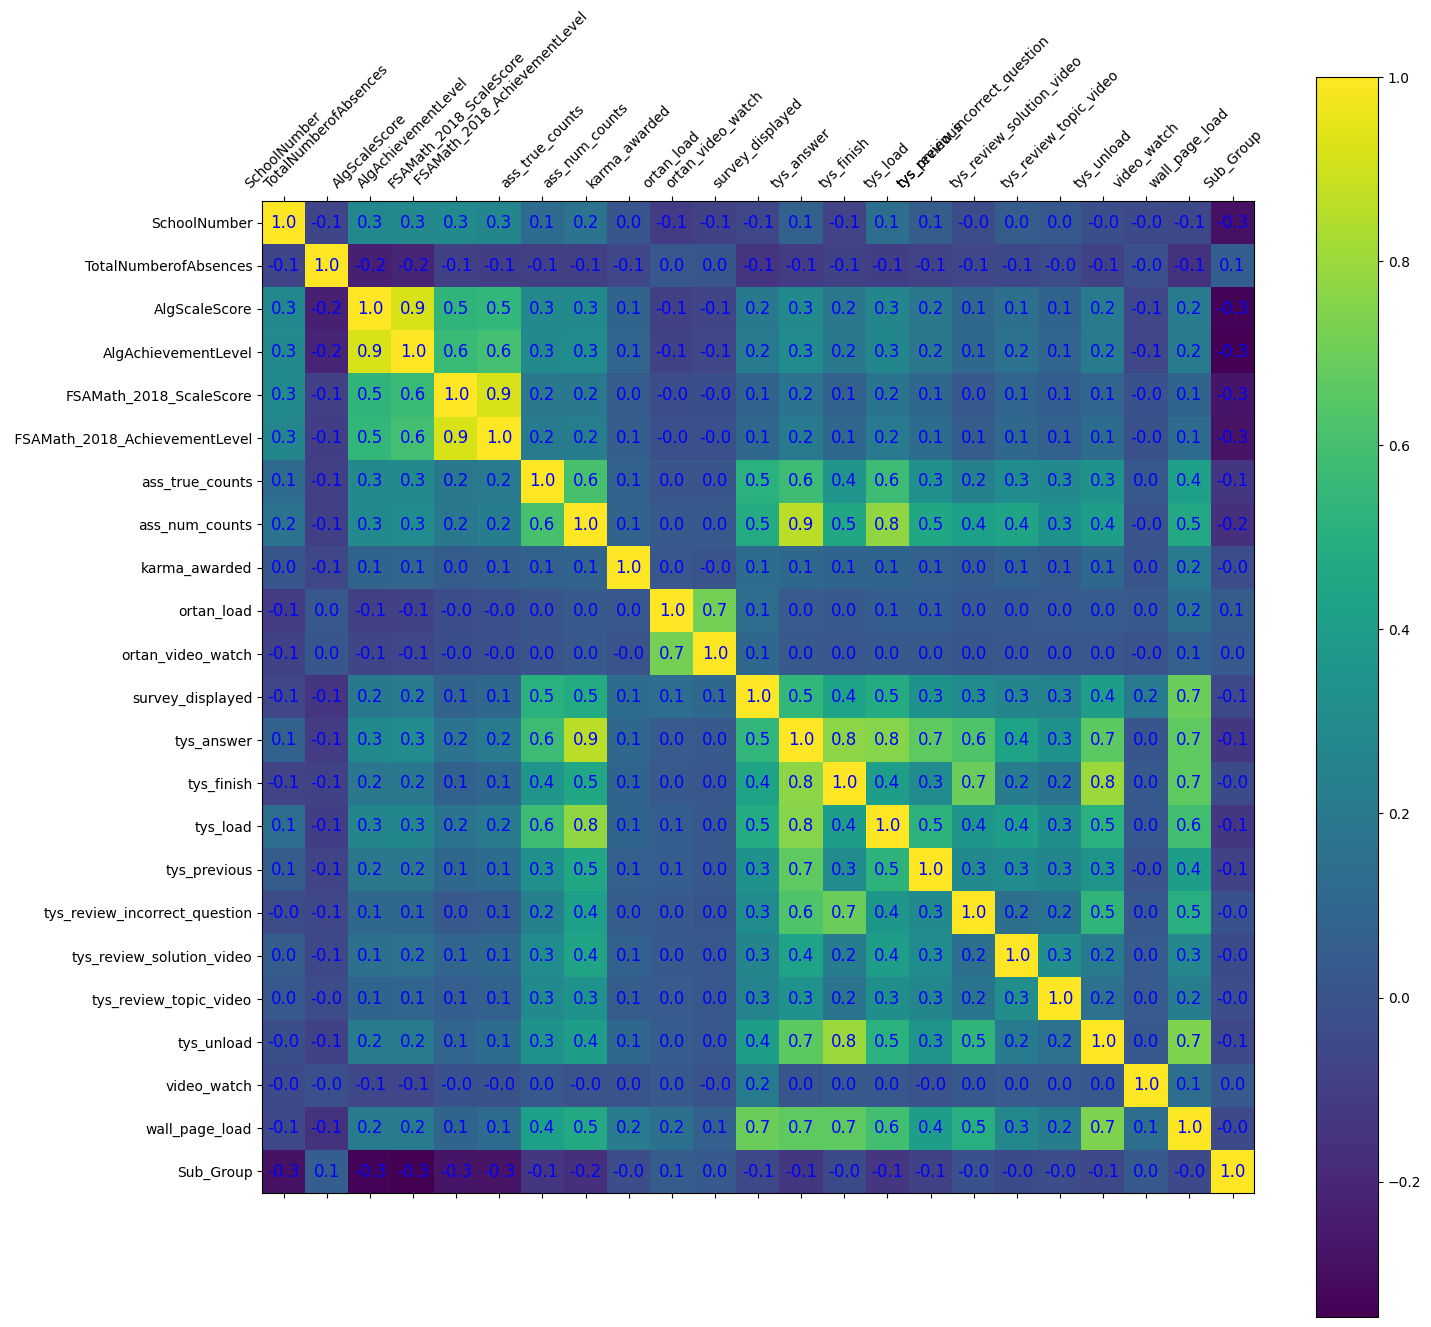

In [ ]:
plt.matshow(train.corr())
plt.colorbar()
plt.xticks(np.arange(len(train.corr().columns)), train.corr().columns.values, rotation = 45)
plt.yticks(np.arange(len(train.corr().columns)), train.corr().columns.values)
for (i, j), corr in np.ndenumerate(train.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='blue', fontsize=12)

In [ ]:
#train= train.dropna(subset=["AlgScaleScore","FSAMath_2018_ScaleScore"])

In [ ]:
X_train.info()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC #支持向量机

In [ ]:
#classifer parameters tunning
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#GridsearchCV KNN
k_range = range(1, 21)
weight_options = ['uniform', 'distance']
al_options =['ball_tree','kd_tree','brute','auto']
param_grid = {'n_neighbors':k_range,'weights':weight_options,'algorithm':al_options}
print(param_grid)
knn = neighbors.KNeighborsClassifier(n_neighbors=5,metric = 'manhattan')
grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv=10, scoring='accuracy')
grid.fit(X_train,  y_train['AlgAchievementLevel'])
print('best para：',grid.best_params_)
print('best estimator：',grid.best_estimator_)


{'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}
best para： {'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'distance'}
best estimator： KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=10,
                     weights='distance')


In [ ]:
param_grid = { 'gamma': [0.001, 0.0001]}
grid_search = GridSearchCV(LinearSVC(), param_grid, n_jobs = 8, verbose=1)
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_estimator_.get_params()
print(best_parameters)

In [ ]:
X_train

,SchoolNumber,TotalNumberofAbsences,FSAMath_2018_ScaleScore,FSAMath_2018_AchievementLevel,ass_true_counts,ass_num_counts,karma_awarded,ortan_load,ortan_video_watch,survey_displayed,...,tys_finish,tys_load,tys_previous,tys_review_incorrect_question,tys_review_solution_video,tys_review_topic_video,tys_unload,video_watch,wall_page_load,Sub_Group
9737,371,2,329.000000,2.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
1748,171,13,329.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4904,2831,33,358.000000,4.000000,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,3
12485,3623,5,332.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7
2185,1751,7,349.509562,3.568038,3.0,11.0,0.0,0.0,0.0,1.0,...,2.0,4.0,0.0,0.0,22.0,0.0,0.0,654.0,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,3541,7,349.509562,3.568038,13.0,32.0,0.0,0.0,0.0,1.0,...,5.0,9.0,4.0,0.0,0.0,0.0,3.0,98.0,11.0,7
5192,1751,8,315.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,1.0,1.0,19.0,0.0,0.0,9.0,0.0,29.0,6
12172,3861,23,349.509562,3.568038,1.0,7.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0
235,1661,3,349.000000,3.000000,14.0,46.0,0.0,2.0,16.0,8.0,...,11.0,10.0,1.0,3.0,62.0,0.0,2.0,780.0,44.0,7


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC #支持向量机

classifiers = [GaussianNB(),
               LinearSVC(),
               neighbors.KNeighborsClassifier(n_neighbors=11,weights= 'distance', algorithm='brute',metric = 'manhattan'),

               MLPClassifier(hidden_layer_sizes= (100,),max_iter=20, solver= 'adam', verbose= True,learning_rate_init= 0.001),
               LogisticRegression(C=0.01, max_iter= 100)]
classifier_names = ["Gaussian Naive Bayes",
                    "svm",
                    "KNN",

                    "NN",
                    "LOGISTIC"]
accuracies = []
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train['AlgAchievementLevel'])
    y_pred = classifier.predict(X_test)
    print(y_pred)
    cnf_matrix = metrics.confusion_matrix(y_test['AlgAchievementLevel'], y_pred)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test['AlgAchievementLevel'], y_pred,average='micro')))
    print("F1 score: {:.2f}".format(f1_score(y_test['AlgAchievementLevel'], y_pred,average='macro')))
    print("Accuracy:",metrics.accuracy_score(y_test['AlgAchievementLevel'], y_pred))
    print("Precision:",metrics.precision_score(y_test['AlgAchievementLevel'], y_pred,average='micro'))

    print("Precision:",metrics.precision_score(y_test['AlgAchievementLevel'], y_pred,average='macro'))
    print("Recall:",metrics.recall_score(y_test['AlgAchievementLevel'], y_pred,average='micro'))
    print("Recall:",metrics.recall_score(y_test['AlgAchievementLevel'], y_pred,average='macro'))
    accuracy = accuracy_score(y_test['AlgAchievementLevel'], y_pred)*100
    accuracies.append(accuracy)

[1 1 1 ... 1 4 5]
Gaussian Naive Bayes:
F1 score: 0.63
F1 score: 0.58
Accuracy: 0.6281571562207671
Precision: 0.6281571562207671
Precision: 0.7243781182700998
Recall: 0.6281571562207671
Recall: 0.5675688721636573
[3 1 1 ... 4 3 4]
svm:
F1 score: 0.47
F1 score: 0.33
Accuracy: 0.47333956969130025
Precision: 0.47333956969130025
Precision: 0.4762181776427001
Recall: 0.47333956969130025
Recall: 0.3959061329645096
[3 1 1 ... 3 3 4]
KNN:
F1 score: 0.76
F1 score: 0.72
Accuracy: 0.7577174929840973
Precision: 0.7577174929840973
Precision: 0.7426678062767541
Recall: 0.7577174929840973
Recall: 0.7040748354203036
Iteration 1, loss = 24.04403864
Iteration 2, loss = 10.36514007
Iteration 3, loss = 5.97900618
Iteration 4, loss = 4.61630632
Iteration 5, loss = 4.06804176
Iteration 6, loss = 3.85006465
Iteration 7, loss = 3.20453010
Iteration 8, loss = 3.39415310
Iteration 9, loss = 3.46901104
Iteration 10, loss = 3.13540608
Iteration 11, loss = 2.69451428
Iteration 12, loss = 2.95176589
Iteration 13, l

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC #支持向量机

classifiers = [GaussianNB(),
               LinearSVC(),
               neighbors.KNeighborsClassifier(n_neighbors=11,weights= 'distance', algorithm='brute',metric = 'manhattan'),

               MLPClassifier(hidden_layer_sizes= (100,),max_iter=20, solver= 'adam', verbose= True,learning_rate_init= 0.001),
               LogisticRegression(C=0.01, max_iter= 100)]
classifier_names = ["Gaussian Naive Bayes",
                    "svm",
                    "KNN",

                    "NN",
                    "LOGISTIC"]
accuracies = []
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train['AlgAchievementLevel'])
    y_pred = classifier.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test['AlgAchievementLevel'], y_pred)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test['AlgAchievementLevel'], y_pred,average='micro')))
    print("Accuracy:",metrics.accuracy_score(y_test['AlgAchievementLevel'], y_pred))
    print("Precision:",metrics.precision_score(y_test['AlgAchievementLevel'], y_pred,average='micro'))
    print("Recall:",metrics.recall_score(y_test['AlgAchievementLevel'], y_pred,average='micro'))
    accuracy = accuracy_score(y_test['AlgAchievementLevel'], y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.63
Accuracy: 0.6281571562207671
Precision: 0.6281571562207671
Recall: 0.6281571562207671
svm:
F1 score: 0.46
Accuracy: 0.46188026192703463
Precision: 0.46188026192703463
Recall: 0.46188026192703463
KNN:
F1 score: 0.76
Accuracy: 0.7577174929840973
Precision: 0.7577174929840973
Recall: 0.7577174929840973
Iteration 1, loss = 19.45779740
Iteration 2, loss = 8.10231979
Iteration 3, loss = 5.12699868
Iteration 4, loss = 3.65784360
Iteration 5, loss = 3.33811428
Iteration 6, loss = 3.37705691
Iteration 7, loss = 3.18480934
Iteration 8, loss = 2.88546620
Iteration 9, loss = 2.67567061
Iteration 10, loss = 2.70456270
Iteration 11, loss = 2.64072770
Iteration 12, loss = 2.48873325
Iteration 13, loss = 2.27337359
Iteration 14, loss = 2.54505889
Iteration 15, loss = 2.49173539
Iteration 16, loss = 2.57975771
Iteration 17, loss = 2.19953603
Iteration 18, loss = 2.34340879
Iteration 19, loss = 2.34749811
Iteration 20, loss = 2.22161226
NN:
F1 score: 0.51
Accuracy: 0

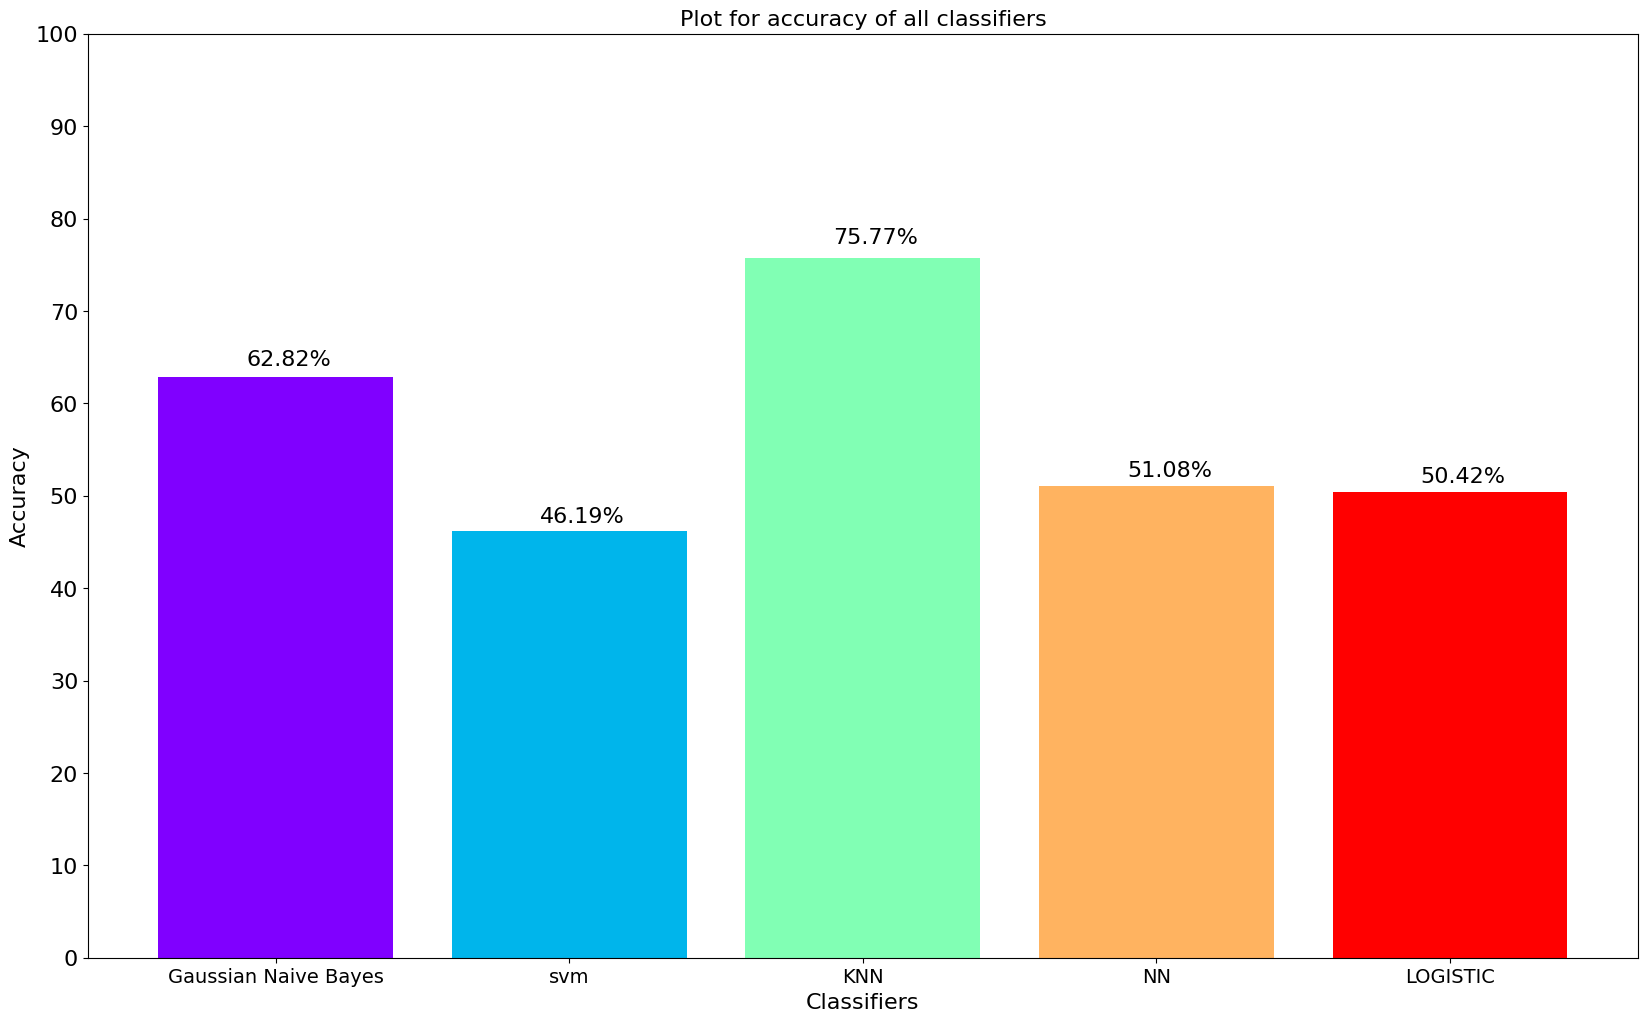

In [ ]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1,
             bar.get_height()*1.02,
             s = '{:.2f}%'.format(accuracies[i]),
             fontsize = 16)

In [ ]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from matplotlib.ticker import FuncFormatter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import pandas as pd
from tensorflow.keras.utils import to_categorical

In [ ]:
X_test

,SchoolNumber,TotalNumberofAbsences,AlgScaleScore,AlgAchievementLevel,FSAMath_2018_ScaleScore,FSAMath_2018_AchievementLevel,ass_true_counts,ass_num_counts,karma_awarded,ortan_load,...,tys_finish,tys_load,tys_previous,tys_review_incorrect_question,tys_review_solution_video,tys_review_topic_video,tys_unload,video_watch,wall_page_load,Sub_Group
3322,371,11,501,3,325.000000,3.000000,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2
5709,241,5,470,1,356.000000,4.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,4
9500,241,4,479,1,335.000000,2.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,6
6283,2561,6,520,4,356.000000,4.000000,72.0,114.0,0.0,0.0,...,15.0,7.0,41.0,0.0,5.0,1.0,5.0,0.0,31.0,0
5367,2751,4,524,4,386.000000,5.000000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,14.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,1741,7,427,1,349.509562,3.568038,1.0,11.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,14.0,6
8429,361,11,473,1,349.509562,3.568038,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,6
4479,1741,0,507,3,359.000000,4.000000,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,6
8996,1391,7,518,4,356.000000,5.000000,0.0,0.0,0.0,2.0,...,65.0,0.0,3.0,115.0,0.0,0.0,11.0,0.0,77.0,6


In [ ]:
def to_percent(temp, position):
    return '%1.0f'%(100*temp)

In [ ]:
def MacroAuc(y_pred,y_test,classifer):#.fit(X_train, y_train['AlgAchievementLevel']),X_train, y_train,
 y_pred = pd.DataFrame(y_pred)
 y_pred.columns = [ 'true']
 y_pred[['a' , 'b' , 'c' , 'd' , 'e']]=pd.DataFrame(classifer.predict_proba(X_test))
 y_pred['Sub_Group'] = y_test['Sub_Group'].to_numpy()
 y_pred['ori'] = y_test['AlgAchievementLevel'].to_numpy()
 y_all = dict()
 aveAuc = []
 for i in [0,2,3,4,6,7]:
   for j in [1,2,3,4,5]:
    a=y_pred[(y_pred['Sub_Group']!=i) & (y_pred['true'] == j)].iloc[:,[j,7]]
    a.columns = ('pred','true')
    b =y_pred[(y_pred['Sub_Group']==i) & (y_pred['true'] != j)].iloc[:,[j,7]]
    b.columns = ('pred','true')
    y_all[i*10+j]= a.append(b)
    for k in range(y_all[i*10+j].shape[0]):
        if (y_all[i*10+j].iloc[k,1] == j):
          y_all[i*10+j].iloc[k,1] = 1
        elif (y_all[i*10+j].iloc[k,1] != j):
          y_all[i*10+j].iloc[k,1] = 0
 for i in [0,2,3,4,6,7]:
      n_classes=5
      fpr = dict()
      tpr = dict()
      roc_auc = dict()
      for j in [1,2,3,4,5]:
        fpr[j], tpr[j], _ = roc_curve(y_all[i*10+j]['true'], y_all[i*10+j]['pred'])
        roc_auc[j] = auc(fpr[j], tpr[j])
      all_fpr = np.unique(np.concatenate([fpr[i] for i in [1,2,3,4,5]]))
# Then interpolate all ROC curves at this points
      mean_tpr = np.zeros_like(all_fpr)
      for i in [1,2,3,4,5]:
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
      mean_tpr /= n_classes
      fpr["macro"] = all_fpr
      tpr["macro"] = mean_tpr
      roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
      aveAuc.append(roc_auc["macro"])
      lw = 2
 return aveAuc

In [ ]:
def MacroAuc(y_pred,y_test,classifer):#.fit(X_train, y_train['AlgAchievementLevel']),X_train, y_train,
 y_pred = pd.DataFrame(y_pred)
 y_pred.columns = [ 'true']
 y_pred[['a' , 'b' , 'c' , 'd' , 'e']]=pd.DataFrame(classifer.predict_proba(X_test))
 y_pred['Sub_Group'] = y_test['Sub_Group'].to_numpy()
 y_pred['ori'] = y_test['AlgAchievementLevel'].to_numpy()
 y_all = dict()
 aveAuc = []
 for i in [0]:
   for j in [1,2,3,4,5]:
    a=y_pred[(y_pred['Sub_Group']!=i) & (y_pred['true'] == j)].iloc[:,[j,7]]
    a.columns = ('pred','true')
    b =y_pred[(y_pred['Sub_Group']==i) & (y_pred['true'] != j)].iloc[:,[j,7]]
    b.columns = ('pred','true')
    y_all[i*10+j]= a.append(b)
    for k in range(y_all[i*10+j].shape[0]):
        if (y_all[i*10+j].iloc[k,1] == j):
          y_all[i*10+j].iloc[k,1] = 1
        elif (y_all[i*10+j].iloc[k,1] != j):
          y_all[i*10+j].iloc[k,1] = 0
 for i in [0,2,3,4,6,7]:
      n_classes=5
      fpr = dict()
      tpr = dict()
      roc_auc = dict()
      for j in [1,2,3,4,5]:
        fpr[j], tpr[j], _ = roc_curve(y_all[i*10+j]['true'], y_all[i*10+j]['pred'])
        roc_auc[j] = auc(fpr[j], tpr[j])
      all_fpr = np.unique(np.concatenate([fpr[i] for i in [1,2,3,4,5]]))
# Then interpolate all ROC curves at this points
      mean_tpr = np.zeros_like(all_fpr)
      for i in [1,2,3,4,5]:
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
      mean_tpr /= n_classes
      fpr["macro"] = all_fpr
      tpr["macro"] = mean_tpr
      roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
      aveAuc.append(roc_auc["macro"])
      lw = 2
# Plot all ROC curves

      plt.figure(figsize = (10, 6))
      #plt.figure()
      labels=['AlgAchievement=1 BPSN ROC Curve','AlgAchievement=1 BPSN ROC Curve','AlgAchievement=2 BPSN ROC Curve','AlgAchievement=3 BPSN ROC Curve','AlgAchievement=4 BPSN ROC Curve','AlgAchievement=5 BPSN ROC Curve']
      plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average BPSN ROC Curve (area = {0:0.4f})'
            ''.format(roc_auc["macro"]),
            color='#023047', linestyle=':', linewidth=4)

      colors = cycle(['#8ecae6', '#e9edc9', '#457b9d','#84a98c','#d4a373'])
      for i, color in zip([1,2,3,4,5], colors):
          plt.plot(fpr[i], tpr[i], color=color, lw=lw,
          label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i]))

      plt.plot([0, 1], [0, 1], 'k--', lw=lw)
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('1-Specificity (%)')
      plt.ylabel('Sensitivity (%)')
      plt.title('macro Average BPSN AUC')
      plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
      plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
      plt.legend(loc="lower right")
      plt.savefig("./test.jpg",dpi=1000,bbox_inches = 'tight')

 return aveAuc

In [ ]:
 neighbors.KNeighborsClassifier(n_neighbors=11,weights= 'distance', algorithm='brute',metric = 'manhattan'),

In [ ]:

plt.figure()
labels=['Category 0','Category 1','Category 2','Category 3','Category 4','Category 5']
plt.plot(fpr["macro"], tpr["macro"],
          label='macro-average ROC curve (area = {0:0.4f})'
          ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow'])
for i, color in zip([1,2,3,4,5], colors):
     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
      label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (%)')
plt.ylabel('Sensitivity (%)')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
plt.legend(loc="lower right")

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
#true_y=y_pred.to_numpy()
true_y=to_categorical(y_test7['AlgAchievementLevel'])
true_y=true_y[:,1:6]
#把每个类别的数据提取出来
PM_y=y_pred7[['a','b','c','d','e']].to_numpy()
PM_y.shape
#计算每个类别的fpr和tpr
n_classes=PM_y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
#计算macro auc

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
       mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [ ]:
!pip install abroca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import abroca

In [ ]:
slice= abroca.compute_abroca(train, pred_col = "yy", label_col = "y",
               protected_attr_col = "Hispanic_Indicator", majority_protected_attr_val = "1"
               )
slice

0 auc is greater than overall auc


{1: 0.006509099847538955}

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F

In [ ]:
class RelationalModule(torch.nn.Module):
    def __init__(self):
        super(RelationalModule, self).__init__()
        self.conv1_ch = 16
        self.conv2_ch = 20 #dim `F` in paper
        self.conv3_ch = 24
        self.conv4_ch = 30
        self.H = 28
        self.W = 28
        self.entity_size = 36 #dim `E`, desired entity embedding size
        self.lin_hid = 100
        self.out_dim = 12
        self.ch_in = 1
        self.sp_coord_dim =2
        self.N = 1705
        #
        self.conv1 = nn.Conv2d(self.ch_in,self.conv1_ch,kernel_size=(8000,8)).cuda()
        self.conv2 = nn.Conv2d(self.conv1_ch,self.conv2_ch,kernel_size=(5000,4)).cuda()
        self.conv3 = nn.Conv2d(self.conv2_ch,self.conv3_ch,kernel_size=(1000,2)).cuda()
        self.conv4 = nn.Conv2d(self.conv3_ch,self.conv4_ch,kernel_size=(100,2)).cuda()
        #
        self.proj_shape = (self.conv4_ch+self.sp_coord_dim,self.entity_size)
        self.k_proj = nn.Linear(*self.proj_shape).cuda()
        self.q_proj = nn.Linear(*self.proj_shape).cuda()
        self.v_proj = nn.Linear(*self.proj_shape).cuda()
        #
        self.node_shape = (self.N,self.entity_size)
        #
        self.k_lin = nn.Linear(self.entity_size,self.N).cuda()
        self.q_lin = nn.Linear(self.entity_size,self.N).cuda()
        #

        self.k_norm = nn.LayerNorm(self.node_shape, elementwise_affine=True).cuda()
        self.q_norm = nn.LayerNorm(self.node_shape, elementwise_affine=True).cuda()
        self.v_norm = nn.LayerNorm(self.node_shape, elementwise_affine=True).cuda()
        #
        self.linear1 = nn.Linear(self.entity_size, self.entity_size).cuda()
        self.norm1 = nn.LayerNorm([self.N,self.entity_size], elementwise_affine=False).cuda()
        self.linear2 = nn.Linear(self.entity_size, self.out_dim).cuda()

    def forward(self,x):
        """
        `x` is a tensor (Batch_Size, C_{in}, Depth=1, Ht, Wt)
        """
        N, Cin, H, W = x.shape
        x = self.conv1(x)
        print(x.shape)
        x = torch.relu(x)
        print(x.shape)
        x = self.conv2(x)
        print(x.shape)
        #x = x.squeeze()
        print(x.shape)
        x = torch.relu(x)
        print(x.shape)
        x = self.conv3(x)
        print(x.shape)
        x = torch.relu(x)
        print(x.shape)
        x = self.conv4(x)
        print(x.shape)
        x = torch.relu(x)
        print(x.shape)

        _,_,cH,cW = x.shape
        print(x.shape)
        xcoords = torch.arange(cW).repeat(cH,1).float().cuda() / cW
        ycoords = torch.arange(cH).repeat(cW,1).transpose(1,0).float().cuda() / cH
        spatial_coords = torch.stack([xcoords,ycoords],dim=0)
        spatial_coords = spatial_coords.unsqueeze(dim=0)
        spatial_coords = spatial_coords.repeat(N,1,1,1)
        #spatial_coords = spatial_coords.repeat(N,1,1)
        x = torch.cat([x,spatial_coords],dim=1)
        print(x.shape)
        x = x.permute(0,2,3,1)
        print(x.shape)
        x = x.flatten(1,2)
        print(x.shape)
        #d到目前为止都可以跑
        K = self.k_proj(x)
        print(x.shape)
        print(K.shape)
        K = self.k_norm(K)

        Q = self.q_proj(x)
        Q = self.q_norm(Q)

        V = self.v_proj(x)
        V = self.v_norm(V)
        A = torch.einsum('bfe,bge->bfg',Q,K)
        A = A / np.sqrt(self.entity_size)
        #A = torch.nn.functional.elu(self.q_lin(Q) + self.k_lin(K))
        A = torch.nn.functional.softmax(A,dim=2)
        with torch.no_grad():
            self.att_map = A.cpu().clone()
        E = torch.einsum('bfc,bcd->bfd',A,V)
        E = self.linear1(E)
        E = torch.relu(E)
        E = self.norm1(E)
        print(E)
        E = E.max(dim=1)[0]
        print(E)
        y = self.linear2(E)
        print(y)
        y = torch.nn.functional.sigmoid(y)
        print(y)
        #y= MaxMinNormalization(y,y.min(),y.max())
        print(y)
        return y

In [ ]:
def add_spots(x,m=20,std=5,val=1):
    mask = torch.zeros(x.shape)
    N = int(m + std * np.abs(np.random.randn()))
    ids = np.random.randint(np.prod(x.shape),size=N)
    mask.view(-1)[ids] = val
    return torch.clamp(x + mask,0,1)
def padding(xt,padding_labels):
    for i in range(xt.shape[0]):
      a=xt[i,0,0:80,0:((padding_labels[i]+1)*10)]
      ZeroPad = nn.ZeroPad2d(padding=(0, (100-((padding_labels[i]+1)*10)), 0, 0))
      xt[i] = ZeroPad(a)
    return xt
def prepare_images(xt,maxtrans,rot,noise):
    """
    Takes an image batch encoded as 0-255 integer pixel values, normalizes to 0 to 1
    """
    print(maxtrans)
    out = torch.zeros(xt.shape)
    for i in range(xt.shape[0]):
        #random translation and noise
        img = xt[i].unsqueeze(dim=0)
        img = TV.transforms.functional.to_pil_image(img)
        rand_rot = np.random.randint(-1*rot,rot,1) if rot > 0 else 0
        xtrans,ytrans = np.random.randint(-maxtrans,maxtrans,2) if maxtrans > 0 else (0,0)
        img = TV.transforms.functional.affine(img, rand_rot, (xtrans,ytrans),1,0)
        img = TV.transforms.functional.to_tensor(img).squeeze()
        if noise > 0:
            img = add_spots(img,m=noise)
        #re-scale to 0-1
        maxval = img.view(-1).max()
        if maxval > 0:
            img = img.float() / maxval
        else:
            img = img.float()
        out[i] = img
    return out

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from random import shuffle
from torch import nn
import torchvision as TV
from torch.utils.tensorboard import SummaryWriter
from collections import deque
!pip install gym-minigrid
!pip install -q tf-nightly-2.0-preview
!pip install einops
from einops import rearrange, reduce
# Load the TensorBoard notebook extension
%load_ext tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 7.5 MB/s 
     |████████████████████████████████| 721 kB 51.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827650 sha256=9980719222bfea665f42deb31cf5b45dbcc74338730e20a6e9806299b5813973
  Stored in directory: /root/.cache/pip/wheels/4d/c8/dc/d08577bffa680f083f04448e81e4f176d0e45a13eb16f93c0c
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.de

In [ ]:
def MaxMinNormalization(x,Max,Min):
    #k=(0.9-0.1)/(Max-Min)
    x = 0.1+0.8*(x-Min)/(Max-Min);
    return x

In [ ]:
k=（b-a)/(Max-Min)
（3）得到归一化到[a,b]区间的数据：norY=a+k(Y-Min)

In [ ]:
y  = FL1_1.sample(n=20000, frac=None, replace=True, weights=None, random_state=None, axis=0)

In [ ]:
y

In [ ]:
slice0

{}

In [ ]:
X_test.info()

In [ ]:
Sub7_1

In [ ]:
X_train

In [ ]:
a

[0.9158269456277196,
 0.8955756865540916,
 0.9129577526546806,
 0.9002107816296765,
 0.9318096957434019,
 0.9346551765112234]

KeyError: ignored

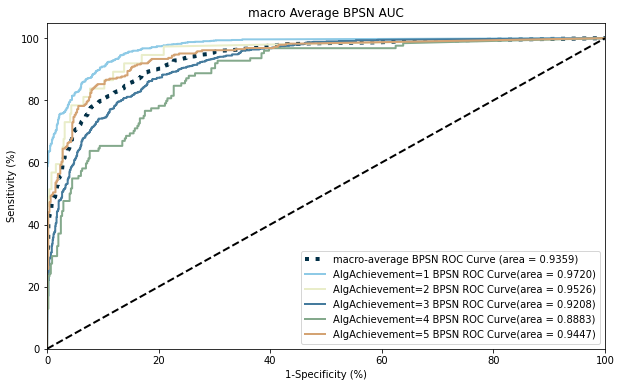

In [ ]:
a=MacroAuc(y_pred,y_test,classifiers[2])

In [ ]:
a= np.ptp(a)

In [ ]:
a

0.03907948995713184

In [ ]:
#%%time
agent = RelationalModule()
#MasterNode = ActorCritic() #A
#agent.share_memory()
#Test train on MNIST
writer = SummaryWriter()
epochs =50
batch_size=10
lr = 1e-3
loss_fn = torch.nn.MSELoss(reduce=True)
opt = torch.optim.Adam(params=agent.parameters(),lr=lr)
losses = []
acc = []
finalscore= 100
rewards = []
a= int(0)
b= int(0)
c=int(0)
for i in range(epochs):
    opt.zero_grad()
    #batch_ids = np.random.randint(0,364,size=batch_size)
    xt = train
    #xt = prepare_images(xt,a,b,c).unsqueeze(dim=1) #add chanel dimension
    #yt = y
    train1= train
    xt= torch.tensor(data=xt.values).float()
    xt=torch.reshape(xt,(1,1,14251,23))
    print(xt.shape)

    pred = agent(xt.cuda()).cpu()
    print('aaaa',pred)
    padding_labels= pred
    print(padding_labels[0])
    y = train1[['AlgAchievementLevel','Sub_Group']]
    X = train1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
    X_train= X_train[X_train['AlgAchievementLevel']==3]
    #y_train= y_train.iloc[0:3000]
    X_train= X_train.append(Sub0_0.iloc[0:int((padding_labels[0,0]*182)),:])
    X_train= X_train.append(Sub0_1.iloc[0:int((padding_labels[0,1]*736)),:])
    X_train= X_train.append(Sub2_0.iloc[0:int((padding_labels[0,2]*240)),:])
    X_train= X_train.append(Sub2_1.iloc[0:int((padding_labels[0,3]*308)),:])
    X_train= X_train.append(Sub3_0.iloc[0:int((padding_labels[0,4]*243)),:])
    X_train= X_train.append(Sub3_1.iloc[0:int((padding_labels[0,5]*572)),:])
    X_train= X_train.append(Sub4_0.iloc[0:int((padding_labels[0,6]*311)),:])
    X_train= X_train.append(Sub4_1.iloc[0:int((padding_labels[0,7]*255)),:])
    X_train= X_train.append(Sub6_0.iloc[0:int((padding_labels[0,8]*2230)),:])
    X_train= X_train.append(Sub6_1.iloc[0:int((padding_labels[0,9]*590)),:])
    X_train= X_train.append(Sub7_0.iloc[0:int((padding_labels[0,10]*976)),:])
    X_train= X_train.append(Sub7_1.iloc[0:int((padding_labels[0,11]*571)),:])

    #X_train= X_train.append(Sub0_0.iloc[0:int((padding_labels[0,0]*182)),:])
    #X_train= X_train.append(Sub0_1.iloc[0:int((padding_labels[0,1]*736)),:])
    #X_train= X_train.append(Sub2_0.iloc[0:int((padding_labels[0,2]*240)),:])
    #X_train= X_train.append(Sub2_1.iloc[0:int((padding_labels[0,3]*308)),:])
    #X_train= X_train.append(Sub3_0.iloc[0:int((padding_labels[0,4]*243)),:])
    #X_train= X_train.append(Sub3_1.iloc[0:int((padding_labels[0,5]*572)),:])
   # X_train= X_train.append(Sub4_0.iloc[0:int((padding_labels[0,6]*311)),:])
    #X_train= X_train.append(Sub4_1.iloc[0:int((padding_labels[0,7]*255)),:])
    #X_train= X_train.append(Sub6_0.iloc[0:int((padding_labels[0,8]*2230)),:])
    #X_train= X_train.append(Sub6_1.iloc[0:int((padding_labels[0,9]*590)),:])
   # X_train= X_train.append(Sub7_0.iloc[0:int((padding_labels[0,10]*976)),:])
    #X_train= X_train.append(Sub7_1.iloc[0:int((padding_labels[0,11]*571)),:])
    #y_train= y_train.append(FL1_1.sample(n=int(padding_labels[0,0]*4000), frac=None, replace=True, weights=None, random_state=None, axis=0))
    #X_train= X_train.append(FL0_0.sample(n=int(padding_labels[0,1]*900), frac=None, replace=False, weights=None, random_state=None, axis=0))
    #y_train= y_train.append(FL0_0.sample(n=int(padding_labels[0,1]*900), frac=None, replace=True, weights=None, random_state=None, axis=0))
    #X_train= X_train.append(FL0_1.sample(n=int(padding_labels[0,2]*4000), frac=None, replace=False, weights=None, random_state=None, axis=0))
    #y_train= y_train.append(FL0_1.sample(n=int(padding_labels[0,2]*4000), frac=None, replace=True, weights=None, random_state=None, axis=0))
    #X_train= X_train.append(FL1_0.sample(n=int(padding_labels[0,3]*5000), frac=None, replace=False, weights=None, random_state=None, axis=0))
    #y_train= y_train.append(FL1_0.sample(n=int(padding_labels[0,3]*5000), frac=None, replace=True, weights=None, random_state=None, axis=0))
    y_train =X_train[['AlgAchievementLevel','Sub_Group']]


    #X_train= X_train.append(RC1_1.iloc[0:int((padding_labels[0,2]*6000)),:])
    #y_train= y_train.append(RC1_1.iloc[0:int((padding_labels[0,2]*6000)),6])
    #X_train= X_train.append(RC0_0.iloc[0:int((padding_labels[0,3]*600)),:])
    #y_train= y_train.append(RC0_0.iloc[0:int((padding_labels[0,3]*600)),6])
    #X_train= X_train.append(HP1_1.iloc[0:int((padding_labels[0,4]*3000)),:])
    #y_train= y_train.append(HP1_1.iloc[0:int((padding_labels[0,4]*3000)),6])
    #X_train= X_train.append(HP0_0.iloc[0:int((padding_labels[0,5]*4000)),:])
    #y_train= y_train.append(HP0_0.iloc[0:int((padding_labels[0,5]*4000)),6])
    X_train = X_train.drop(['AlgAchievementLevel'], axis = 1)
    X_test =X_test.drop(['AlgAchievementLevel'], axis = 1)
    X_train = pd.get_dummies(X_train)
    X_test1=X_test
    X_test = pd.get_dummies(X_test)
    print(y_train)
    #classifier = GaussianNB()
    classifier = neighbors.KNeighborsClassifier(n_neighbors=11,weights= 'distance', algorithm='brute',metric = 'manhattan')
    classifier.fit(X_train, y_train['AlgAchievementLevel'])
    y_pred = classifier.predict(X_test)
    rocAVE = MacroAuc(y_pred,y_test,classifier)
    acc_ = metrics.accuracy_score(y_test['AlgAchievementLevel'], y_pred)
    acc.append(acc_)
    reward= 50-np.ptp(rocAVE)*1000
    #reward = np.std(rocAVE,ddof=1)*100
    #for everyKey in slice0 :
        #a += slice0[everyKey]
    #reward=100*a
    rewards.append(reward)
    if finalscore> reward:
      finalscore = reward
      final_acc= acc_
      final_group=pred
      arocAVE =rocAVE
    print("best roc",finalscore,final_acc,final_group,arocAVE)
    #correct = torch.zeros(batch_size,10)
    #rows = torch.arange(batch_size).long()
    #correct[[rows,reward.detach().long()]] = 1.
    #pred=pred.long()
    print(reward)
    print("a",a,acc_,pred,rocAVE)
    print(pred)
    #loss =torch.tensor(1- reward/100,requires_grad=True)
   #losses.append(loss.detach().numpy())
    cur_reward = reward #F
    print('1111111111111',pred)
    one_hot_reward = pred.data.numpy().copy() #G
    pred1 = torch.nn.functional.softmax(pred,dim=1)
    #print('2',one_hot_reward[1])

    one_hot_reward[0,0] =cur_reward
    one_hot_reward[0,1] = cur_reward
    one_hot_reward[0,2] = cur_reward
    one_hot_reward[0,3] = cur_reward
    one_hot_reward[0,4] = cur_reward
    one_hot_reward[0,5] = cur_reward
    one_hot_reward[0,6] = cur_reward
    one_hot_reward[0,7] = cur_reward
    one_hot_reward[0,8] = cur_reward
    one_hot_reward[0,9] = cur_reward
    one_hot_reward[0,10] = cur_reward
    one_hot_reward[0,11] = cur_reward
    #one_hot_reward[0,4] = cur_reward*pred[0,4].detach().numpy()
    #one_hot_reward[0,5] = cur_reward*pred[0,5].detach().numpy()
    print('3',one_hot_reward)
    #print('4',one_hot_reward[choice])
    reward = torch.Tensor(one_hot_reward)
    print('5',reward )
    #rocAVE  = torch.Tensor(rocAVE)
    print('44',reward)
    print('..',pred)
    loss = loss_fn(pred,reward)
    print('6',loss)
    losses.append(loss.detach().numpy())
    writer.add_scalar('Loss/train', loss.detach().numpy(), i)
    writer.add_scalar('Acc/train', acc_, i)
    #loss.requires_grad_(True)
    #opt.zero_grad()
    loss.backward()
    opt.step()
losses = np.array(losses)
acc = np.array(acc)

torch.Size([1, 1, 14251, 23])
torch.Size([1, 16, 6252, 16])
torch.Size([1, 16, 6252, 16])
torch.Size([1, 20, 1253, 13])
torch.Size([1, 20, 1253, 13])
torch.Size([1, 20, 1253, 13])
torch.Size([1, 24, 254, 12])
torch.Size([1, 24, 254, 12])
torch.Size([1, 30, 155, 11])
torch.Size([1, 30, 155, 11])
torch.Size([1, 30, 155, 11])
torch.Size([1, 32, 155, 11])
torch.Size([1, 155, 11, 32])
torch.Size([1, 1705, 32])
torch.Size([1, 1705, 32])
torch.Size([1, 1705, 36])
tensor([[[-0.5517, -0.5517,  0.4183,  ..., -0.5517,  0.3757, -0.5517],
         [-0.5517, -0.5517,  0.5367,  ..., -0.5517,  0.3563, -0.5517],
         [-0.5517, -0.5517,  0.4569,  ..., -0.5517,  0.2889, -0.5517],
         ...,
         [-0.5517, -0.5517,  0.3927,  ..., -0.5517,  0.3093, -0.5517],
         [-0.5517, -0.5517,  0.4854,  ..., -0.5517,  1.1245, -0.5517],
         [-0.5517, -0.5517,  0.3987,  ..., -0.5517,  0.4035, -0.5517]]],
       device='cuda:0', grad_fn=<NativeLayerNormBackward0>)
tensor([[-0.5118, -0.5517,  1.8003,  

In [ ]:
def running_mean(x,w=3,step=1):
    c = 1.0/w
    conv = np.array([c]).repeat(w)
    output = []
    s,e = 0,w
    for i in range(x.shape[0]):
        sub = x[s:e]
        if sub.shape[0] < w:
            break
        tmp = conv @ sub
        output.append(tmp)
        s = s + step
        e = s + w
    return np.array(output)

In [ ]:
best roc 0.03323359237786494 0.7387745556594949 tensor([[0.3295, 0.6884, 0.6827, 0.2280, 0.7775, 0.5845, 0.5705, 0.2239, 0.9011,
         0.8962, 0.8046, 0.9387]], grad_fn=<ToCopyBackward0>) [0.9100005819286939, 0.89509816417178, 0.9105798095039809, 0.8998652008528271, 0.9263994830414818, 0.928331756549645]
best roc 0.02355708308346527 0.7011225444340505 tensor([[0.1944, 0.2532, 0.2756, 0.3603, 0.1218, 0.1954, 0.0794, 0.3731, 0.5494,
         0.2038, 0.1906, 0.2407]], grad_fn=<ToCopyBackward0>) [0.8866539728421705, 0.8733199539870968, 0.8821074056646966, 0.8770387099207342, 0.8922115340442136, 0.8968770370705621]
est roc 0.011067031600463961 0.6859214218896165 tensor([[0.2043, 0.0871, 0.7088, 0.0535, 0.0392, 0.6244, 0.3813, 0.6387, 0.2849,
         0.8536, 0.6022, 0.3467]], grad_fn=<ToCopyBackward0>) [0.9089543175637087, 0.9042816455668308, 0.9083208286427995, 0.906338623385021, 0.9029636882705702, 0.9140307198710341]
best roc 0.02090080532382521 0.710243217960711 tensor([[0.8331, 0.5363, 0.1635, 0.6487, 0.2507, 0.5543, 0.6300, 0.6404, 0.7766,
         0.3528, 0.1740, 0.5394]], grad_fn=<ToCopyBackward0>) [0.9059388543898441, 0.8956263488079121, 0.9064317695382478, 0.8990342529636957, 0.9163592711937318, 0.9165271541317374]
best roc 0.023936379145605646 0.7142188961646398 tensor([[0.8935, 0.5516, 0.2764, 0.8547, 0.6040, 0.7019, 0.2954, 0.7651, 0.8652,
         0.1492, 0.2318, 0.3745]], grad_fn=<ToCopyBackward0>) [0.9028871676595746, 0.8924745862870116, 0.9057807939217462, 0.8952435550028541, 0.9130859111052195, 0.9164109654326172]

SyntaxError: ignored

best roc 0.007732738214442314 0.6772684752104771 tensor([[0.5712, 0.3297, 0.1926, 0.2431, 0.7471, 0.3264, 0.1274, 0.4429, 0.3791,
         0.4900, 0.3118, 0.3627]], grad_fn=<ToCopyBackward0>) [0.9031606299579586, 0.8981096976762881, 0.9037102679327397, 0.9023350936885501, 0.9011640667186365, 0.9058424358907304]


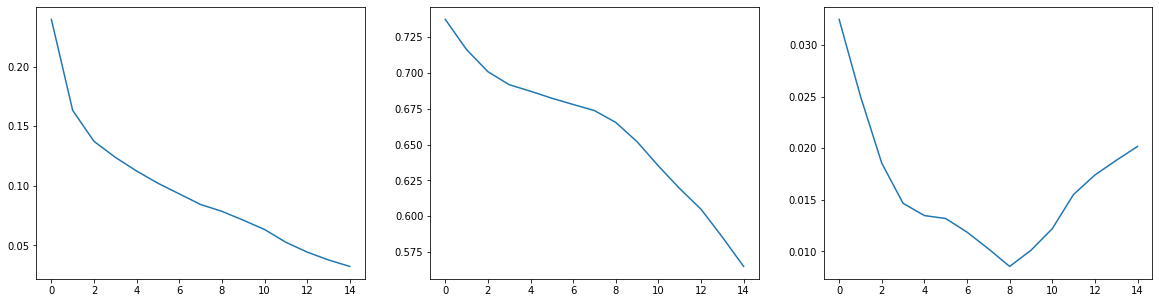

In [ ]:
rewards = np.array(rewards)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))
print("best roc",finalscore,final_acc,final_group,arocAVE)

In [ ]:
acc=np.array([0.758886810102899,0.73877456, 0.71492049, 0.69550982, 0.6924696 , 0.68755847, 0.68194574,
       0.6777362 , 0.67446211, 0.66908326, 0.65294668, 0.63400374, 0.61833489,
       0.6054724 , 0.59073901,  0.55986904, 0.54396632])

In [ ]:
rewards =np.array([0.03907949,0.03323359,0.0251387 , 0.01674081, 0.01376679,  0.01347194,0.01317783,
       0.01291192, 0.00951026, 0.00835082, 0.00776605, 0.01420918, 0.01462884,
       0.01772085, 0.01985749, 0.01888518, 0.02177163])


In [ ]:
losses= np.array([0.3656324 , 0.20165329, 0.15143923, 0.13651673, 0.12386855,
       0.11118973, 0.10214449, 0.09308246, 0.08446499, 0.07541365,0.07588402, 0.06224608,
       0.0520163 , 0.0436486 , 0.03759218, 0.03219073, 0.02729692])

best roc 17.165425612708173 0.637511693171188 tensor([[0.6698, 0.1852, 0.1886, 0.4884, 0.8116, 0.2771, 0.3280, 0.5149, 0.1622,
         0.7088, 0.0130, 0.3436]], grad_fn=<ToCopyBackward0>) [0.898449547010036, 0.8975568059852209, 0.8986144096144855, 0.9011047540210898, 0.8839393284083816, 0.8975772025844899]


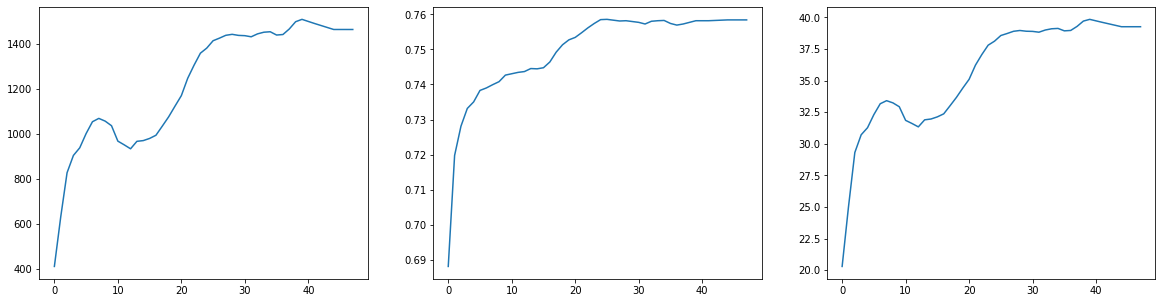

In [ ]:
rewards = np.array(rewards)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))
print("best roc",finalscore,final_acc,final_group,arocAVE)

In [ ]:
a = [0.8864393604613398, 0.8704638308326447, 0.8874121854569079, 0.874281545730386, 0.9025106358487418, 0.902882008955773]
a = a.mean()

best roc 0.00589607798641012 0.6711880261927035 tensor([[0.1377, 0.3142, 0.2447, 0.1792, 0.3614, 0.6509, 0.3701, 0.4026, 0.3927,
         0.3360, 0.3261, 0.2663]], grad_fn=<ToCopyBackward0>) [0.8993571593225985, 0.8990853645115574, 0.9010953243476851, 0.9016936880455735, 0.8998020482253896, 0.9049814424979675]


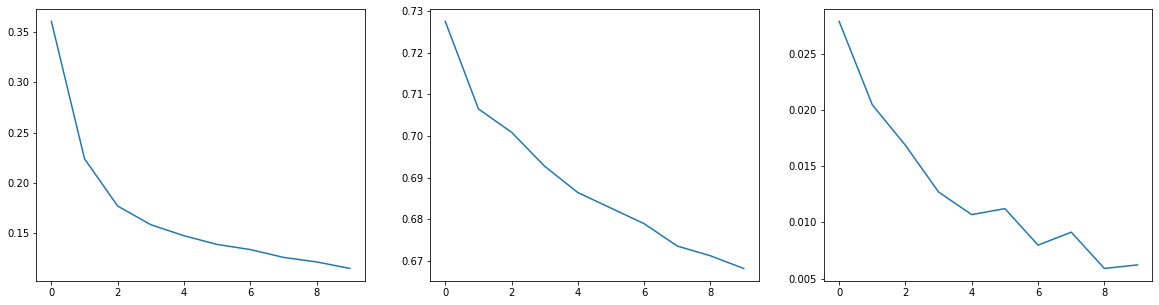

In [ ]:
rewards = np.array(rewards)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))
print("best roc",finalscore,final_acc,final_group,arocAVE)

best roc 0.008384983737777185 0.6608980355472404 tensor([[0.2247, 0.2182, 0.5187, 0.3125, 0.3399, 0.3814, 0.3761, 0.2260, 0.3146,
         0.2866, 0.1904, 0.6161]], grad_fn=<ToCopyBackward0>) [0.8988461856814565, 0.8991107072485129, 0.9000264828186926, 0.9003286730923884, 0.8935975818488446, 0.9019825655866218]


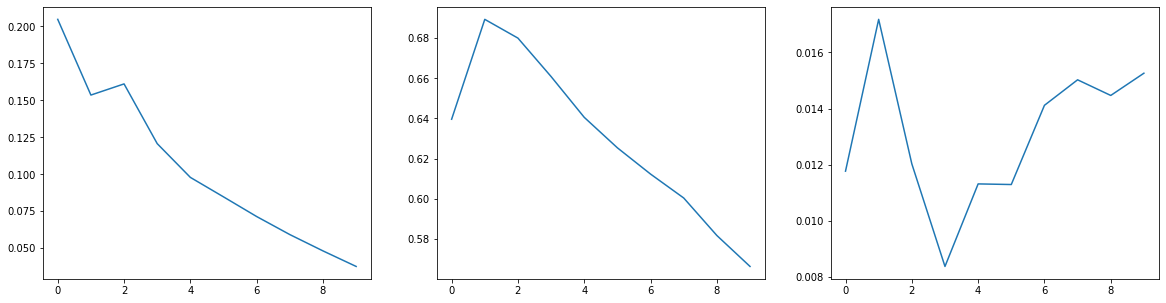

In [ ]:
rewards = np.array(rewards)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))
print("best roc",finalscore,final_acc,final_group,arocAVE)

best roc 0.050990076411247975 0.5972871842843779 tensor([[0.3052, 0.4268, 0.2455, 0.2881, 0.3194, 0.2397, 0.3963, 0.1130, 0.3382,
         0.3072, 0.3634, 0.3128]], grad_fn=<ToCopyBackward0>) [0.9264029976584972, 0.8976415188922316, 0.9210614054127882, 0.8970961707453087, 0.9480862471565566, 0.9409159479449699]


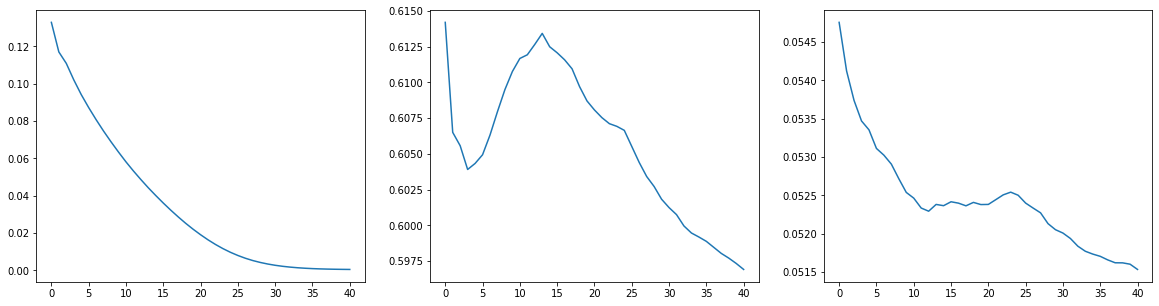

In [ ]:
rewards = np.array(rewards)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))
print("best roc",finalscore,final_acc,final_group,arocAVE)

best roc 0.05105479242035471 0.6199719363891487 tensor([[0.6042, 0.0952, 0.4394, 0.3059, 0.4132, 0.2205, 0.3383, 0.2323, 0.2500,
         0.1868, 0.2894, 0.1298]], grad_fn=<ToCopyBackward0>) [0.9298948150393865, 0.9004693261326138, 0.9243099919787288, 0.8985018308658421, 0.9495566232861968, 0.941819146112101]


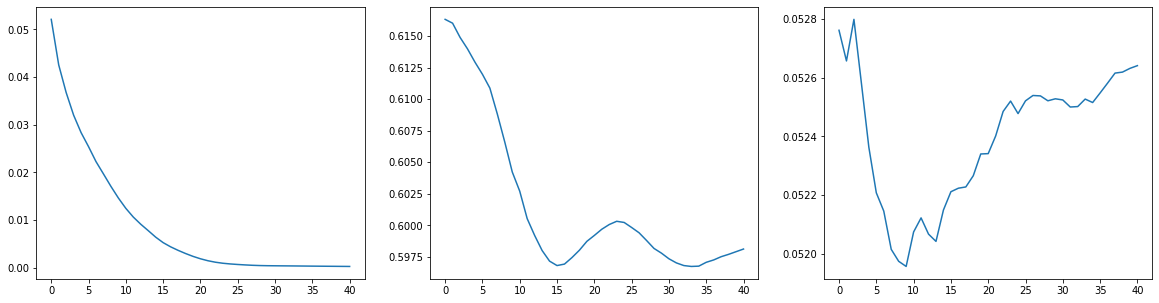

In [ ]:
rewards = np.array(rewards)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))
print("best roc",finalscore,final_acc,final_group,arocAVE)

In [ ]:
print("best roc",finalscore,final_acc,final_group)

best roc 0.589136907087815 0.9462114125350796 tensor([[0.7835, 0.6346, 0.8138, 0.8025, 0.5577, 0.4494, 0.3287, 0.5333, 0.5332,
         0.7392, 0.3118, 0.2703]], grad_fn=<ToCopyBackward0>)


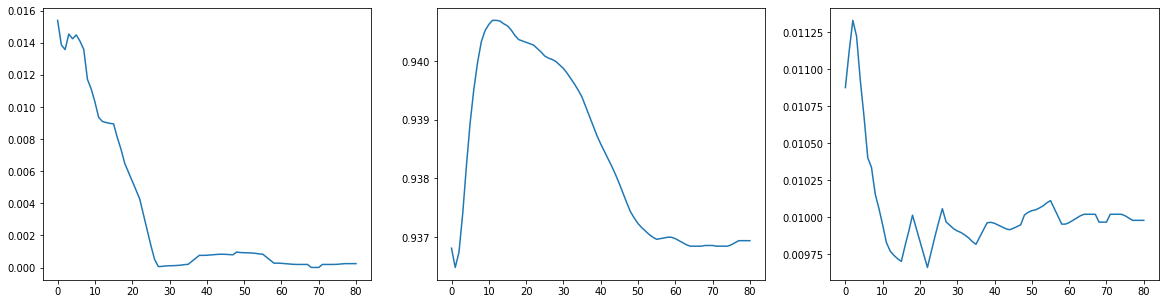

In [ ]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))

In [ ]:
print("best roc",finalscore,final_acc,final_group)

best roc 0.6819983744019973 0.9471468662301216 tensor([[0.5331, 0.8770, 0.8930, 0.6679, 0.4580, 0.7980, 0.7160, 0.1544, 0.3299,
         0.7508, 0.7248, 0.2623]], grad_fn=<ToCopyBackward0>)


In [ ]:
print("best roc",finalscore,final_acc,final_group)

best roc 0.4121697235531253 0.9997661365762395 tensor([[0.9999, 0.9987, 0.9777, 0.9678, 0.9966, 0.9962, 1.0000, 0.9996, 0.9964,
         0.9937, 0.9967, 0.9992]], grad_fn=<ToCopyBackward0>)


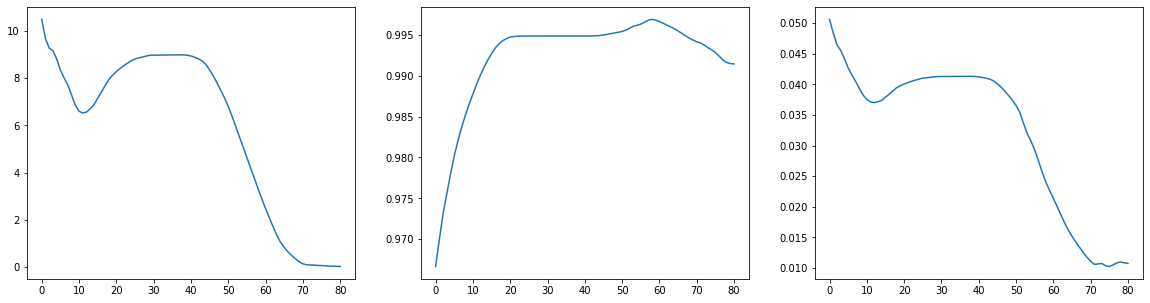

In [ ]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))

best roc 1.7400588192997908 0.6737605238540693 tensor([[0.7475, 0.7478, 0.6770, 0.8932, 0.5688, 0.6610, 0.7306, 0.6961, 0.7459,
         0.8100, 0.7574, 0.6083]], grad_fn=<ToCopyBackward0>)


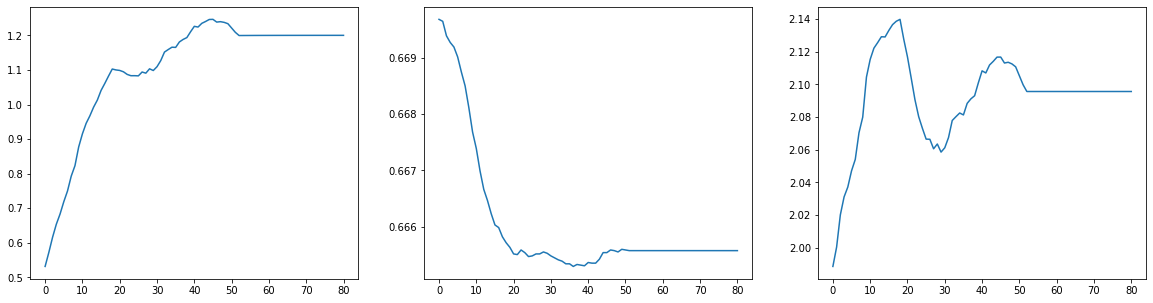

In [ ]:
rewards = np.array(rewards)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))
print("best roc",finalscore,final_acc,final_group)

best roc 1.622850025332046 0.671889616463985 tensor([[0.5677, 0.8831, 0.6820, 0.8442, 0.4125, 0.7294, 0.9470, 0.8139, 0.2205,
         0.4877, 0.8978, 0.8723]], grad_fn=<ToCopyBackward0>)


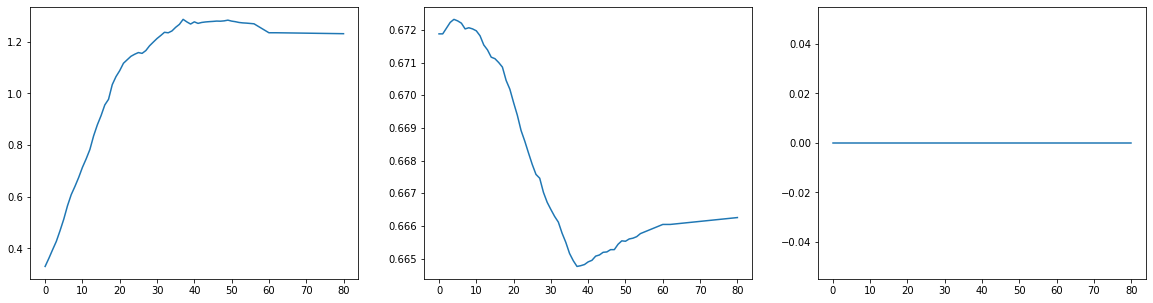

In [ ]:
rewards = np.array(rewards)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))
print("best roc",finalscore,final_acc,final_group)

In [ ]:
rewards

array([tensor([[0.1627, 0.1273, 0.1608, 0.1106, 0.1091, 0.1612, 0.1365, 0.1409, 0.1290,
                0.1877, 0.1448, 0.1731]])                                              ,
       tensor([[0.2278, 0.1570, 0.1704, 0.1786, 0.1881, 0.2184, 0.2002, 0.1631, 0.2915,
                0.2141, 0.2727, 0.2339]])                                              ,
       tensor([[0.1759, 0.1547, 0.1530, 0.1727, 0.1589, 0.2700, 0.1821, 0.1445, 0.1911,
                0.1790, 0.2324, 0.1656]])                                              ,
       tensor([[0.2015, 0.1702, 0.1659, 0.1837, 0.1702, 0.2890, 0.1949, 0.1579, 0.1944,
                0.1862, 0.2441, 0.1753]])                                              ,
       tensor([[0.2044, 0.1643, 0.1623, 0.1773, 0.1684, 0.2702, 0.1884, 0.1561, 0.1882,
                0.1744, 0.2333, 0.1686]])                                              ,
       tensor([[0.2152, 0.1661, 0.1661, 0.1795, 0.1756, 0.2625, 0.1914, 0.1627, 0.1935,
                0.1734, 0.2

ValueError: ignored

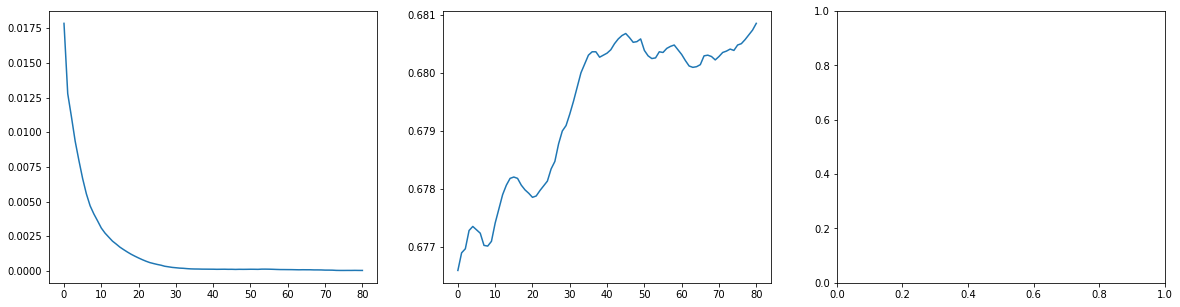

In [ ]:
rewards = np.array(rewards)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
ax[0].plot(running_mean(losses))
ax[1].plot(running_mean(acc))
ax[2].plot(running_mean(rewards))
print("best roc",finalscore,final_acc,final_group)